# **Let's get it - 파이썬 프로그래밍**
---
## **Part2**
### Self Check

1. card.csv 파일은 10월붙터 12월까지 3개월간의 카드 이용내역을 담은 파일입니다. 카드 이용내역에는 승인거래와 취소거래가 섞여 있습니다. 카드 이용내역 중 취소거래의 총액을 구하는 코드를 작성하세요.

- 매입상태가 전표매입이 아닌 건은 모두 취소거래입니다.
- 취소거래의 총액을 저장하는 변수가 있어야 합니다.

In [ ]:
# 코랩 그래프 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import csv

In [ ]:
# csv파일 읽어오기
f = open('/content/drive/MyDrive/Colab Notebooks/Lets_get_it/card.csv')

data = csv.reader(f)
next(data)
data = list(data)
print(data)

[['2019-10-12 9:13', '1972753', '본', 'S&', '185', '네이버파이낸셜(주)', '546800', '일시불(A)', '부분취소'], ['2019-10-12 11:56', '3399357', '본', 'S&', '185', 'GS  샵', '60440', '일시불(A)', '전표매입'], ['2019-10-13 9:16', '12621902', '본', 'S&', '185', 'G마켓', '91520', 'P(A)', '전표매입'], ['2019-10-14 1:32', '20726947', '본', 'S&', '185', '11번가', '89810', '일시불(A)', '전표매입'], ['2019-10-14 7:06', '21234320', '본', 'S&', '185', '네이버파이낸셜(주)', '33600', '일시불(A)', '전표매입'], ['2019-10-15 23:32', '42229559', '본', 'S&', '185', '네이버파이낸셜(주)', '309600', '일시불(A)', '부분취소'], ['2019-10-16 8:00', '43433092', '본', 'S&', '185', 'SSG.COM', '61983', '일시불(A)', '부분취소'], ['2019-10-16 16:04', '48341209', '본', 'S&', '185', '(주)에이랜드 타임스퀘어', '31600', '일시불', '전표매입'], ['2019-10-17 1:13', '3495922', '본', 'S&', '185', '(주)어패럴컴퍼니', '97000', '일시불(A)', '부분취소'], ['2019-10-17 20:19', '12252560', '본', 'S&', '185', '(주)곱', '96000', '일시불', '전표매입'], ['2019-10-17 20:28', '12336385', '본', 'S&', '185', '카카오택시(선승인)', '4200', '일시불', '승인취소'], ['2019-10-17 20:35',

In [ ]:
# 취소거래의 총액 구하기
cancel_sum = 0
for i in data:
    if i[-1] != '전표매입':
        cancel_sum += int(i[-3])

print('취소거래의 총액:', cancel_sum, '원')

취소거래의 총액: 3245797 원


In [ ]:
# Pandas 활용
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lets_get_it/card.csv')

df

,이용일시,승인번호,본인구분,브랜드,이용카드,가맹점명,이용금액,이용구분,매입상태
0,2019-10-12 9:13,1972753,본,S&,185,네이버파이낸셜(주),546800,일시불(A),부분취소
1,2019-10-12 11:56,3399357,본,S&,185,GS 샵,60440,일시불(A),전표매입
2,2019-10-13 9:16,12621902,본,S&,185,G마켓,91520,P(A),전표매입
3,2019-10-14 1:32,20726947,본,S&,185,11번가,89810,일시불(A),전표매입
4,2019-10-14 7:06,21234320,본,S&,185,네이버파이낸셜(주),33600,일시불(A),전표매입
...,...,...,...,...,...,...,...,...,...
231,2019-12-30 17:59,11171348,본,S&,185,카페마마스 강남역지점,16800,일시불,전표매입
232,2019-12-31 12:35,18054067,본,S&,185,(주)현대백화점신촌점,51502,일시불,전표매입
233,2019-12-31 12:43,18170026,본,S&,185,(주)현대백화점신촌점,9200,일시불,전표매입
234,2019-12-31 12:50,18277034,본,S&,185,(주)현대백화점신촌점,15000,일시불,전표매입


In [ ]:
df[df['매입상태'] != '전표매입']['이용금액'].sum()

3245797

2. card.csv 파일의 카드 이용내역에서 월별로 백화점에서 사용한 금액을 꺽은선 그래프로 그리세요. 그래프 이름은 '10~12월 백화점 지출액'으로 합니다.

- 그래프를 그리려면 10~12월 백화점 지출액을 하나의 리스트로 저장해야 합니다.
- 백화점 지출액은 가맹점명에 '백화점' 키워드가 들어가 있습니다.

In [ ]:
# 월별 백화점 지출액 리스트 만들기
month_sum = [0, 0, 0]
for i in data:
    idx = int(i[0].split('-')[1]) -10
    if  '백화점' in i[5]:
        month_sum[idx] += int(i[-3])

print(month_sum)

[11000, 506200, 232102]


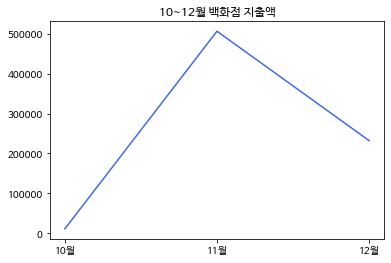

In [ ]:
plt.title('10~12월 백화점 지출액')
plt.plot(['10월', '11월', '12월'], month_sum, color='royalblue')
plt.show()